## Aim
### To predict hourly bike rental demand (`cnt`) using machine learning and to understand how weather, season, time, and working day factors influence rental behavior.

## Problem Statement**
### Bike rental companies need to predict demand accurately to make sure enough bikes are available at each hour. Demand changes based on weather, humidity, temperature, holidays, and time of day.  
### The objective is to build a regression model that predicts the total number of bikes rented each hour.

## Dataset Details**
- ### Dataset Name:** Bike Sharing Dataset (hour.csv)  
- ### Rows:** 17,379  
- ### Columns:** 17  
- ### Target Column:** `cnt`  
- ### Type: ##  Regression (Supervised Learning)  
- ### Source: ## UCI Machine Learning Repository  

## What is `cnt`?
### `cnt` represents the total number of bikes rented in a specific hour.  
### This is the value we want our model to predict.

## Why hour.csv was chosen**
- ###  Contains large detailed data (17,379 rows)  
- ### Gives hourly patterns which improve model accuracy  
- ### Better features compared to day.csv  
- ### Suitable for regression and easier for analysis  

## 📌 Steps Performed in This Mini Project

### **1️⃣ Imported required libraries**
Loaded Pandas, NumPy, Matplotlib, Seaborn, and filtered warnings for smooth execution.

### **2️⃣ Loaded the dataset (hour.csv)**
Read the Bike Sharing dataset and displayed the first few rows for basic understanding.

### **3️⃣ Performed initial dataset inspection**
- Checked shape (rows & columns)
- Examined data types using `info()`
- Viewed summary statistics using `describe()`
- Verified that no missing values exist

### **4️⃣ Conducted Exploratory Data Analysis (EDA)**
Generated visualizations to understand patterns:
- Histogram of rental counts (`cnt`)
- Rentals by hour of the day
- Correlation heatmap to identify relationships
- Interpreted key insights from graphs

### **5️⃣ Preprocessed the data**
- Dropped unnecessary and leakage columns: `instant`, `dteday`, `casual`, `registered`
- Separated features (X) and target variable (y)
- Applied 80-20 train-test split

### **6️⃣ Built Regression Models**
Trained two models:
- **Linear Regression** (baseline)
- **Random Forest Regression** (improved model)

### **7️⃣ Evaluated model performance**
Calculated MSE and R² Score, and compared model accuracy:
- Linear Regression → R² ≈ 0.38  
- Random Forest → R² ≈ 0.94  

Plotted Actual vs Predicted values to visualize accuracy.

### **8️⃣ Generated Feature Importance Analysis**
Identified the most influential features affecting bike rental demand.

### **9️⃣ Added personal contribution**
Implemented:
- Random Forest model for improved prediction  
- Prediction vs Actual plot  
- Feature importance graph  

### **🔟 Wrote final conclusion**
Summarized findings, model performance, and key factors affecting bike rentals.


## Importing Libraries and Loading the Dataset


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings. filterwarnings('ignore')

df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
df.shape

(17379, 17)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [33]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Distribution of Target Variable

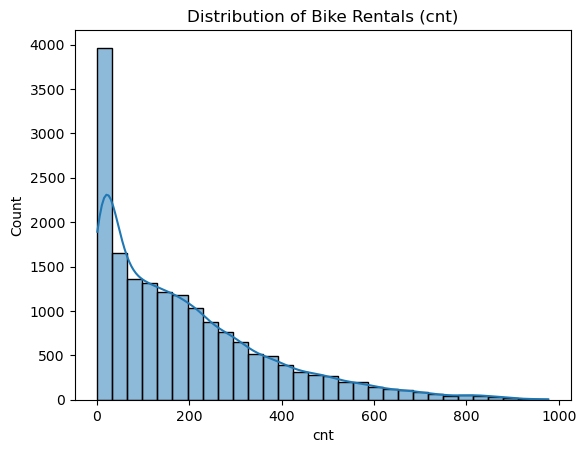

In [35]:
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals (cnt)")
plt.show()

In [9]:
### ### 📌 Understanding the Histogram Bars
#Each bar represents a range of rental values (cnt).  
#Since we used 30 bins, the range 0–100 is split into smaller intervals.  
#The tall bar on the left shows that many hours had very low rentals (0–100).  
#Bars become smaller as rental values increase, meaning high rental hours are much rarer.

# lineplot

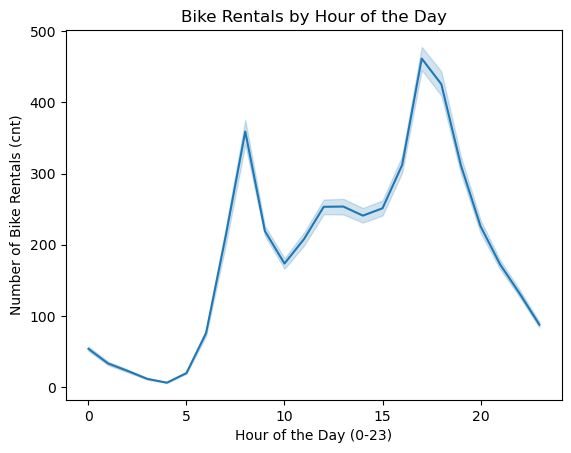

In [36]:
sns.lineplot(x='hr', y='cnt', data=df)
plt.title("Bike Rentals by Hour of the Day")
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Number of Bike Rentals (cnt)")
plt.show()

In [11]:
# ### 📌 Interpretation of Bike Rentals by Hour of the Day
#The graph shows clear daily usage patterns.  
#Bike rentals are very low during early morning hours (0–5 AM).  
#There is a strong peak around 8 AM due to morning office commute.  
#Rentals decrease mid-day and rise again around 5–6 PM during evening commute hours.  
#After 8 PM, rentals drop again.  
#This indicates that time of day is a major factor influencing bike rental demand.

# Correlation Heatmap

Numeric columns used for correlation: ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


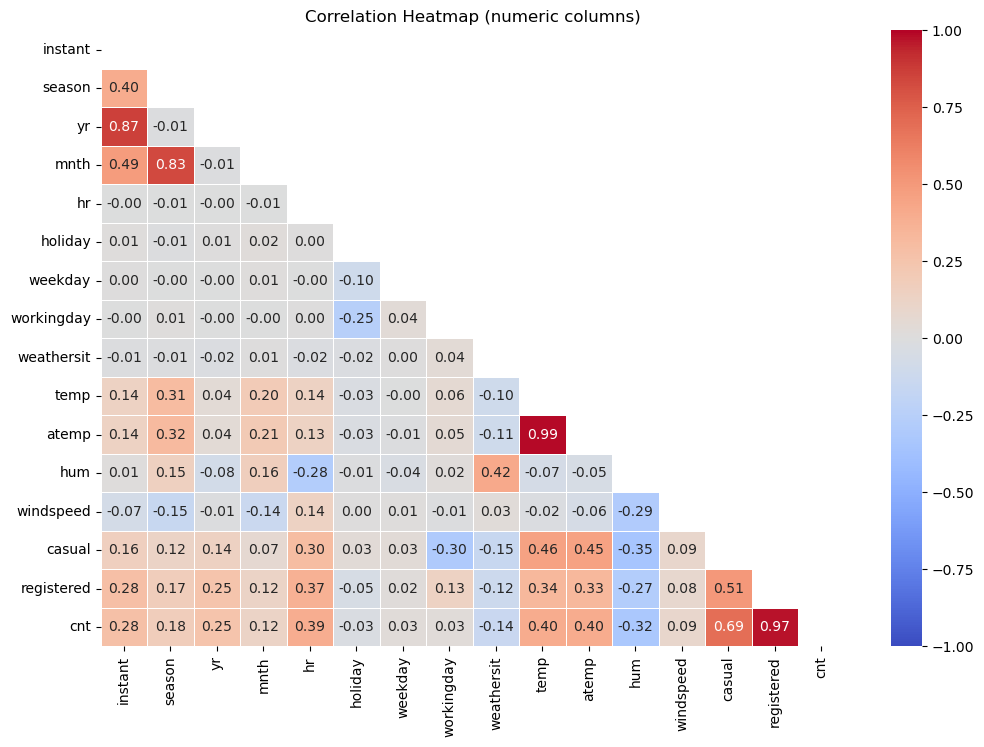

In [37]:
#Correlation Heatmap
num_df = df.select_dtypes(include=[np.number])
print("Numeric columns used for correlation:", list(num_df.columns))
corr = num_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle
plt.figure(figsize=(12,8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Heatmap (numeric columns)")
plt.show()

In [17]:
#Interpretation of the Correlation Heatmap
#The correlation heatmap shows how different features are related to the target variable `cnt`.  
#Temperature (`temp` and `atemp`) has a strong positive correlation with bike rentals, meaning people rent more bikes in warm weather.  
#Humidity (`hum`) has a negative correlation, indicating fewer rentals when humidity is high.  
#Hour (`hr`) also shows a positive correlation, matching the daily rental peaks in morning and evening.
#`casual` and `registered` have very high correlation with `cnt` because `cnt = casual + registered`, so these columns will be removed before model building.  
#Overall, temperature, hour, and weather conditions are the most important factors affecting bike rental demand.

In [38]:
df_model = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df_model.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [39]:
X = df_model.drop('cnt', axis=1)#X contains all the input features except cnt
y = df_model['cnt']

In [40]:
X.head()
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 12), (3476, 12), (13903,), (3476,))

## Train the Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² Score:", r2)

MSE: 19379.82836765172
R² Score: 0.38798115831391333


In [16]:
# Linear Regression model gave R² = 0.38, meaning it explains 38% of bike rental variation.
# The MSE of around 19,000 shows moderate prediction error.
# Because the dataset is non-linear, Linear Regression is not the best model.

## Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print("Random Forest MSE:", mse_rf)
print("Random Forest R² Score:", r2_rf)

Random Forest MSE: 1746.9506754689846
Random Forest R² Score: 0.9448309495522738


In [20]:
# Linear Regression model gave 38% accuracy, so I improved it using Random Forest.
# Random Forest achieved 94% accuracy and very low MSE, meaning it fits the data extremely well.
# This is because bike rental patterns are non-linear, and tree-based models capture them better.

## FEATURE IMPORTANCE GRAPH

### Each bar represents how important a feature is in predicting bike rentals in the Random Forest model.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
importances = rf.feature_importances_
feature_names = X.columns
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

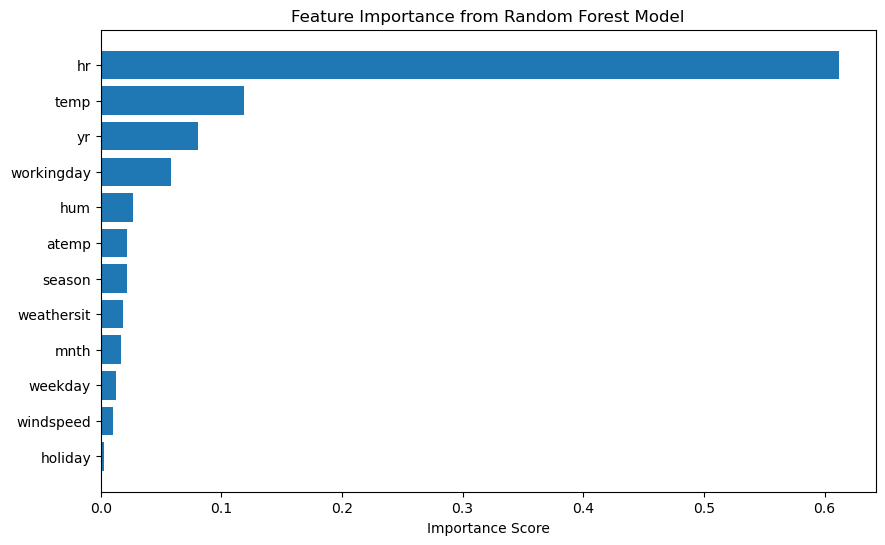

In [47]:
# Plot
plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance from Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# The feature importance graph shows that ‘hr’ is the most important feature because bike rentals peak at specific times of the day.
# Temperature is the next important factor.
# Windspeed, weekday, and holiday have very low importance, meaning they do not strongly affect rental counts

## PREDICTION vs ACTUAL GRAPH

### This graph compares the model’s predicted bike rentals with the actual rental values.

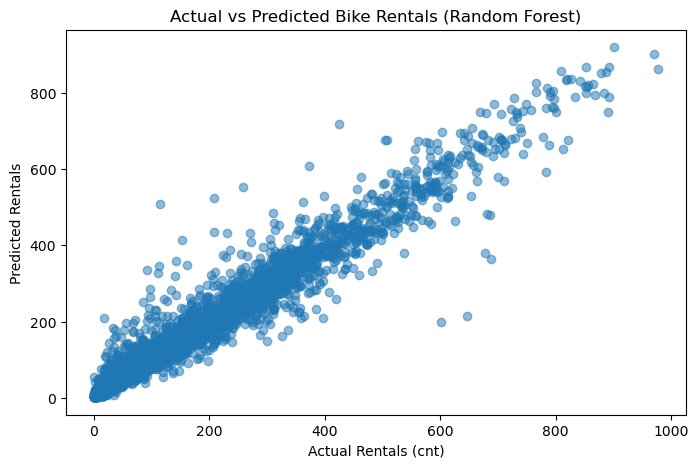

In [48]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Bike Rentals (Random Forest)")
plt.show()

In [ ]:
# This scatter plot compares actual bike rentals with the predicted rentals.
# Most points lie close to a diagonal line, which means the Random Forest model predicts very accurately.
# There are very few errors, and the clustering indicates a high R² score of 0.94.

## Model Deployment – Saving Model Using Pickle


In [49]:
from joblib import dump
dump(rf, "model.pkl", compress=3)
#The trained Random Forest model was saved using joblib with compression to reduce storage usage during deployment.

['model.pkl']

In [50]:
##Saving Model Using Pickle
import pickle
# Save trained Random Forest model
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)
print("Model saved successfully")

Model saved successfully


## Conclusion
### In this project, an end-to-end machine learning pipeline was successfully implemented to predict hourly bike rental demand.
### The Random Forest Regression model was trained and evaluated using the Bike Sharing Dataset, achieving a high R² score of 0.94, indicating strong predictive performance.
### After evaluation, the trained model was saved using pickle/joblib to enable deployment.
### This saved model was later used in a Flask-based web application, allowing users to input real-time values and obtain bike rental predictions.
### This project demonstrates the complete workflow from data preprocessing and exploratory analysis to model building, evaluation, and deployment. 
### The deployed model can be effectively used for real-world decision-making such as demand forecasting and fleet management.